In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
df=pd.read_excel("DataMidSem2024.xlsx", sheet_name='Q2')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df.shape

(400, 4)

In [4]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [6]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [7]:
for e in df.columns[:-1]:
    q1=np.quantile(df[e],0.25)
    q3=np.quantile(df[e],0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df[e]=np.where(df[e]<lb,lb,df[e])
    df[e]=np.where(df[e]>ub,ub,df[e])

In [8]:
X=df.drop(columns=["admit"])
X.head()

,gre,gpa,rank
0,380.0,3.61,3
1,660.0,3.67,3
2,800.0,4.00,1
3,640.0,3.19,4
4,520.0,2.93,4


In [9]:
y=df["admit"]
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: admit, dtype: float64

In [10]:
y.value_counts()

0.0    273
1.0    127
Name: admit, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lreg=LogisticRegression()

In [16]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=lreg.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))
print()
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[50  3]
 [23  4]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79        53
         1.0       0.57      0.15      0.24        27

    accuracy                           0.68        80
   macro avg       0.63      0.55      0.51        80
weighted avg       0.65      0.68      0.61        80



In [24]:
X_new={"gre":[600],
       "gpa":[3.5],
       "rank":[3]}

In [25]:
X_new=pd.DataFrame(X_new)

In [26]:
y=lreg.predict(X_new)

In [27]:
y

array([1.])

In [29]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [30]:
roc_auc = auc(fpr, tpr)

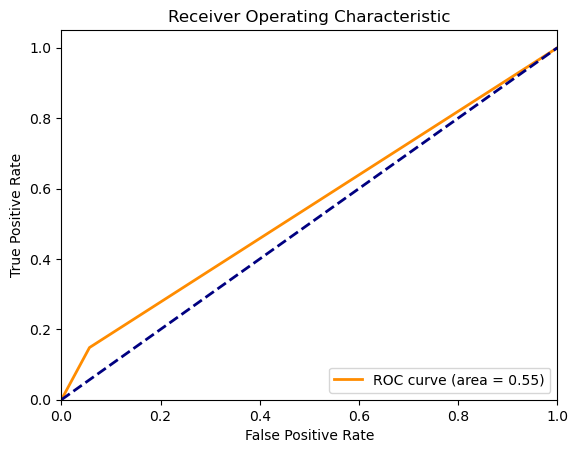

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()